# Oscilador Harmônico - simples e forçado

por Prof. Dr Bruno Honda

As rotinas abaixo resolvem e plotam gráficos para osciladores harmônicos, num sistema massa-mola.

Começamos importando as bibliotecas básicas:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#from jupyterthemes import jtplot
#jtplot.style()

%matplotlib inline

In [3]:
# o ympy é um pactote simbólico, para tratar variáveis literais
from sympy import *

# importar os símbolos gamma e omega (letras gregas)
from sympy.abc import gamma, omega

Vamos definir as 'variáveis literais' que serão usadas nos cálculos - no caso, as condições iniciais serão os símbolos x0 e v0:

In [4]:
# definir condições iniciais:

x0, v0 = symbols('x0 v0', real=True)

t = symbols('t', real=True)

Vamos definir agora as variáveis escalares: a posição x, velocidade x1 (primeira derivada) e aceleração x2 (segunda derivada)
(obs. a função .diff(t) é aplicada para retornar a derivada da função) 

In [5]:
# variáveis escalares

x = Function('x')
def x1(t):
    return x(t).diff(t)
def x2(t): 
    return x1(t).diff(t)

In [6]:
# Digitando a ED:

edoh = Eq(x2(t)+2*gamma*x1(t)+omega**2*x(t), 0)
edoh

Eq(2*gamma*Derivative(x(t), t) + omega**2*x(t) + Derivative(x(t), (t, 2)), 0)

In [7]:
#resolvendo a ED:

dsolve(edoh)

Eq(x(t), C1*exp(t*(-gamma - sqrt(gamma**2 - omega**2))) + C2*exp(t*(-gamma + sqrt(gamma**2 - omega**2))))

In [8]:
# dicionário com as condições iniciais:

ci = {x(0): x0, x1(t).subs(t,0): v0}


# resolvendo a EDO (ics sãp as condições iniciais 'initial conditions'):

dsolve(edoh, ics=ci)

Eq(x(t), (v0 + x0*(gamma + sqrt(gamma**2 - omega**2)))*exp(t*(-gamma + sqrt(gamma**2 - omega**2)))/(2*sqrt(gamma**2 - omega**2)) - (gamma*x0 + v0 - x0*sqrt(gamma**2 - omega**2))*exp(t*(-gamma - sqrt(gamma**2 - omega**2)))/(2*sqrt(gamma**2 - omega**2)))

## Encapsular tudo em uma única função

In [9]:
# a função recebe omega, gamma, v0, x0, e uma matriz T com os valores de tempo entre 0 e 4. 

# se a ED a oscilação fo forçada, basta trocar o argumento 0 pela força externa... e voilà!

def x_oh(omg, gmma=0, v0=0, x0=1, T=np.arange(0,4,0.01)):
    eq_oh = Eq(x2(t)+2*gmma*x1(t)+omg**2*x(t), 0)
    res = dsolve(eq_oh, ics={x(0): x0, x1(t).subs(t,0): v0})
    x_sol = lambdify(t, res.rhs, 'numpy')
    return res, x_sol(T)
    

In [10]:
res, x_sol = x_oh(2) # Oscilador harmônico simples
res

Eq(x(t), cos(2*t))

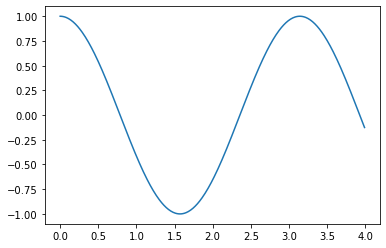

In [11]:
# as soluções são do tipo:

plt.plot(np.arange(0,4,0.01),x_sol)
plt.show()

In [12]:

# se a ED a oscilação fo forçada, basta trocar o argumento 0 pela força externa... e voilà!

def x_oh(omg, gmma=0, v0=0, x0=1, T=np.arange(0,4,0.01)):
    eq_oh = Eq(x2(t)+2*gmma*x1(t)+omg**2*x(t), cos(t))
    res = dsolve(eq_oh, ics={x(0): x0, x1(t).subs(t,0): v0})
    x_sol = lambdify(t, res.rhs, 'numpy')
    return res, x_sol(T)

In [13]:
res, x_sol = x_oh(2) # Oscilador harmônico forçado
res

Eq(x(t), cos(t)/3 + 2*cos(2*t)/3)

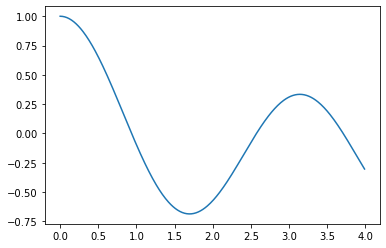

In [14]:
plt.plot(np.arange(0,4,0.01),x_sol)
plt.show()

## Visualizando...

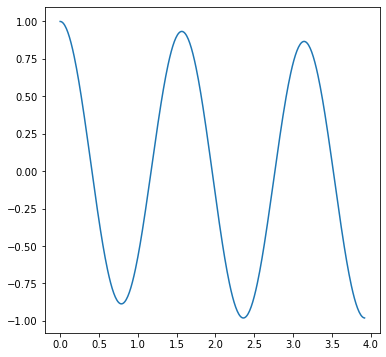

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
omg = 4
gmma = 0
tempo = np.arange(0, 5*np.pi/omg, 0.01)
res, y = x_oh(omg, gmma, T=tempo)
ax.plot(tempo, y)
plt.show()

## Painel para diferentes amortecimentos

Neste exemplo, vamos escolher $\omega=4$, e $\gamma$ variando de tal forma a obter todos os casos possíveis na resolução da EDO:

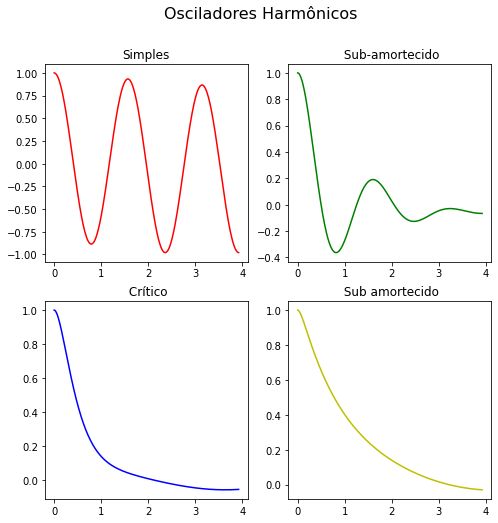

In [16]:
fig, ax = plt.subplots(2,2,figsize=(8,8))
omg = 4
gmma = [0,1,omg,2*omg]
title = 'Simples; Sub-amortecido; Crítico; Sub amortecido'.split(';')
cores = 'r g b y'.split(' ')

tempo = np.arange(0, 5*np.pi/omg, 0.01)

res = []

for g, axe, fname, cor in zip(gmma, ax.flat, title, cores):
        sol = x_oh(omg, g, T=tempo)
        axe.plot(tempo, sol[1], c=cor)
        axe.set_title(fname, fontsize=12)
        
fig.suptitle('Osciladores Harmônicos', fontsize=16)
plt.show()